In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [49]:
# np.random.seed(42)
x=np.linspace(-5,5,51)
template =lambda x: np.exp(-x**2/2)
sim=np.zeros((10000,51)) 

# simulation of 10k observations
for i in range(10000):
    sim[i,:]=np.random.randn(51)+template(x)

Text(0.5, 1.0, 'Template shape vs Real data')

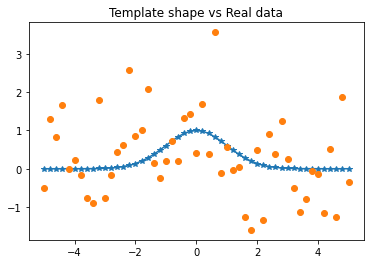

In [96]:
plt.plot(x,template(x),'-*', label='Template')
plt.plot(x,sim[0],'o', label='Noisy realization')
plt.title("Template shape vs Real data")

In [50]:
noise_std=np.std(sim,axis=1).reshape(10000,1) #noise in each realization of simulation

#### Since we're only fitting an amplitude and noise in all 51 points is the same, it'll cancel out. 

In [82]:
A=template(x).reshape(51,1) #calculating the A in A*m
lhs=np.sum(A**2) 
sim_ampl=sim@A/lhs  #Simulation amplitudes -- 10,000 long array of amplitudes for each observation
# The dot product is the other way round compared to the formula because I set up (10k,51 )array, instead of (51,10k)

In [52]:
ampl_noise = noise_std/np.sqrt(lhs)   # (A^T N^-1 A)^-1

### Now that we've obtained 10k amplitudes from 10k observations, we have yet another max-likelihood problem --- fit a mean to measured amplitudes. Refer to eqn (18) in the PDF, best fit mean is just noise weighted average. And the error in best-fit amplitude is given by eqn (22)

In [63]:
bestfit_ampl = np.sum(sim_ampl/ampl_noise**2)/np.sum(1/ampl_noise**2)
bestfit_ampl_err = np.sqrt(1/np.sum(1/ampl_noise**2))

In [64]:
print("Best fit amplitude is:", weighted_ampl, "and 1-sigma error on it is", np.sqrt(1/np.sum(1/ampl_noise**2)))

Best fit amplitude is: 0.9805878707524567 and 1-sigma error on it is 0.0034470277346384647


In [81]:
bias = (bestfit_ampl-1)
bias_snr = bias/bestfit_ampl_err

print(f"We obtain a bias of {bias*100:2.1f}% with significance {np.abs(bias_snr):2.1f} sigma")

We obtain a bias of -1.9% with significance 5.6 sigma


We see that the bestfit global amplitude is biased low. 

However, the amplitude of an individual chunk is unbiased as shown below (since the noise cancels out during estimation).

Bias is fundamentally defined as $<m - m_{true}>$ where m is the parameter of interest.

In [80]:
single_chunk_bias = np.mean(sim_ampl-1)
single_chunk_snr = single_chunk_bias/bestfit_ampl_err
print(f"Bias of single chunk amplitude is {single_chunk_bias*100:2.1f}% ({single_chunk_bias:5.3f}) with significance {single_chunk_snr:2.1f} sigma" )

Bias of single chunk amplitude is 0.3% (0.003) with significance 0.8 sigma


So we see that's is extremely small, and not significant.

#### In order to reduce the bias, we could either subtract a nominal model from all observation sets (fixed model), or estimate the errors from some a priori information about the system being analyzed.